In [11]:
import numpy as np
import pandas as pd
import pypianoroll as pr
import matplotlib.pyplot as plt
import importlib
import json
import xml.etree.ElementTree as ET
import os
import sys
import pickle
from time import time

import torch
from torch import nn
import numpy as np
from torch.nn import functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable

#### 读取数据

In [12]:
sys.path.append('..')
import dataloader
importlib.reload(dataloader)
import model
#importlib.reload(model)
from dataloader import DataLoader
importlib.reload(DataLoader)
from model.DeepModel import * 
#importlib.reload(model.DeepModel)
DL = DataLoader.DataLoader(device='cpu')
# DL.process_raw_data()

reading global_chord_num_dic
reading global_num_chord_dic
reading global_num_chord_one_hot_dic
reading double_compressed_data


#### 统计大小调所有和弦数目，出现的三，七和弦数目以及全部使用三，七和弦的样本数

In [13]:
total = 0  # 出现的和弦总数
triad_num = 0  # 三和弦总数
triad_num_dic = {'minor':{i:0 for i in DL.global_chord_num_dic['minor'].keys()},
                 'major':{i:0 for i in DL.global_chord_num_dic['major'].keys()}}
triad_sample_num = 0 # 全部使用三和弦的样本数
triad_samples = {'major': [], 'minor': []}
for sample in DL.double_compressed_data:
    if sample['key'] in ['A','B','C','D','E','F','G']:
        m = 'major'
    else:
        m = 'minor'
    sample_copy = sample.copy()
    melody = sample['melody']
    chord = sample['chord']
    t = True
    for i in range(len(melody)):
        total += 1
        try:
            DL.global_chord_num_dic[m][chord[i]]
            triad_num_dic[m][chord[i]] += 1
            triad_num += 1
        except:
            if len(chord[i]) < 3:
                for c in DL.global_chord_num_dic[m].keys():
                    if melody[i] not in c:
                        continue
                    for k in chord[i]:
                        if k not in c:
                            break
                    else:
                        sample_copy['chord'][i] = c
                        triad_num_dic[m][c] += 1
                        triad_num += 1
                        break
                else:
                    t = False
            else:
                t = False
                pass
    if t:
        triad_samples[m].append(sample_copy)
        triad_sample_num += 1

print(total)
print(triad_num)
print(triad_sample_num)

306469
142234
3329


## 模型训练

In [14]:
import AutoChord
importlib.reload(AutoChord)
from AutoChord import AutoChord
importlib.reload(AutoChord)
AC = AutoChord.AutoChord()

reading global_chord_num_dic
reading global_num_chord_dic
reading global_num_chord_one_hot_dic
reading double_compressed_data


#### 小调不加权

In [15]:
DL.get_train_data(min_length=1, write_cache=False, 
                  valid_compressed_data=triad_samples['minor'],
                  tonic='minor')

total 9928 valid train_data


In [30]:
params = arams = {'chord_num': 48, 'device': 'cuda'}
AC.get_model(model_name='lstm', params=params)
train_loss, test_loss = AC.fit(DL.train_data[:7000], DL.train_data[7000:], epochs=100)

loss: 3.8736 time used: 2.0739s
loss: 3.8585 time used: 1.8252s
loss: 3.8392 time used: 1.9047s
loss: 3.8189 time used: 1.8657s
loss: 3.7907 time used: 1.9738s
loss: 3.7687 time used: 1.8977s
epoch 0 testing
test loss: 3.7310 time used: 2.2696s
loss: 3.7315 time used: 1.8817s
loss: 3.6963 time used: 2.0173s
loss: 3.6442 time used: 1.8837s
loss: 3.5854 time used: 1.9177s
loss: 3.5073 time used: 1.8867s
loss: 3.4161 time used: 1.8737s
epoch 1 testing
test loss: 3.2482 time used: 2.2841s
loss: 3.2867 time used: 1.9278s
loss: 3.1194 time used: 1.8897s
loss: 2.9477 time used: 1.8827s
loss: 2.7551 time used: 1.9107s
loss: 2.6451 time used: 1.8777s
loss: 2.6835 time used: 1.8677s
epoch 2 testing
test loss: 2.5832 time used: 2.2801s
loss: 2.7339 time used: 1.8587s
loss: 2.5671 time used: 1.8892s
loss: 2.5302 time used: 1.9678s
loss: 2.5843 time used: 1.8872s
loss: 2.5841 time used: 1.9087s
loss: 2.5786 time used: 1.9037s
epoch 3 testing
test loss: 2.4676 time used: 2.2855s
loss: 2.5063 time us

loss: 1.9582 time used: 1.8927s
loss: 1.9574 time used: 1.8597s
loss: 1.9482 time used: 1.9087s
epoch 33 testing
test loss: 1.9298 time used: 2.2921s
loss: 2.0139 time used: 1.9288s
loss: 1.9592 time used: 1.9077s
loss: 1.9742 time used: 1.8806s
loss: 1.9305 time used: 1.8777s
loss: 1.9426 time used: 1.9187s
loss: 1.9786 time used: 1.8802s
epoch 34 testing
test loss: 1.9258 time used: 2.2701s
loss: 2.0115 time used: 1.8751s
loss: 1.8537 time used: 1.8957s
loss: 1.9411 time used: 1.8787s
loss: 1.9685 time used: 1.9237s
loss: 1.9612 time used: 1.8837s
loss: 1.9590 time used: 1.9127s
epoch 35 testing
test loss: 1.9225 time used: 2.2731s
loss: 1.9653 time used: 1.8577s
loss: 1.8582 time used: 1.9047s
loss: 1.9774 time used: 1.9037s
loss: 1.9102 time used: 1.9268s
loss: 1.9820 time used: 1.9083s
loss: 1.9993 time used: 1.8667s
epoch 36 testing
test loss: 1.9133 time used: 2.2831s
loss: 1.9472 time used: 1.8982s
loss: 1.9385 time used: 1.9117s
loss: 1.9915 time used: 1.8857s
loss: 1.9652 tim

epoch 66 testing
test loss: 1.8376 time used: 2.2591s
loss: 1.7645 time used: 1.8662s
loss: 1.7784 time used: 1.8622s
loss: 1.8230 time used: 1.8678s
loss: 1.8137 time used: 1.8957s
loss: 1.8318 time used: 1.8791s
loss: 1.7719 time used: 1.8567s
epoch 67 testing
test loss: 1.8357 time used: 2.2441s
loss: 1.8300 time used: 1.8597s
loss: 1.8165 time used: 1.8617s
loss: 1.7693 time used: 1.8577s
loss: 1.8049 time used: 1.8777s
loss: 1.7773 time used: 1.8727s
loss: 1.7369 time used: 1.8383s
epoch 68 testing
test loss: 1.8200 time used: 2.2330s
loss: 1.8003 time used: 1.8567s
loss: 1.7838 time used: 1.8823s
loss: 1.7665 time used: 1.8467s
loss: 1.7816 time used: 1.8586s
loss: 1.7733 time used: 1.8267s
loss: 1.7365 time used: 1.8447s
epoch 69 testing
test loss: 1.8308 time used: 2.2370s
loss: 1.7081 time used: 1.8727s
loss: 1.7623 time used: 1.8407s
loss: 1.7973 time used: 1.8527s
loss: 1.7534 time used: 1.8667s
loss: 1.8449 time used: 1.8293s
loss: 1.8007 time used: 1.8397s
epoch 70 testing

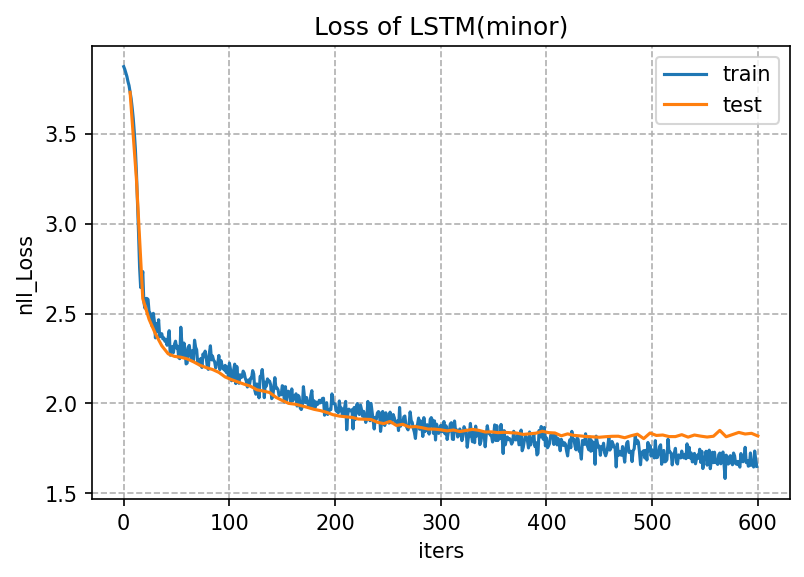

In [31]:
plt.figure(dpi=150)
plt.plot(train_loss,label='train')
plt.plot([i*6 for i in range(1,101)], test_loss[:], label='test')
plt.xlabel('iters')
plt.grid(linestyle='--')
plt.legend()
plt.ylabel('nll_Loss')
plt.title('Loss of LSTM(minor)')
plt.show()

In [34]:
torch.save(AC.model.model, '../trained_models/minor_lstm')

#### 大调不加权

In [35]:
DL.get_train_data(min_length=1, write_cache=False,
                  valid_compressed_data=triad_samples['major'], tonic='major')

10000 valid train_data
20000 valid train_data
30000 valid train_data
total 32003 valid train_data


In [36]:
params = arams = {'chord_num': 48, 'device': 'cuda'}
AC.get_model(model_name='lstm', params=params)
train_loss, test_loss = AC.fit(DL.train_data[:22000], DL.train_data[22000:], epochs=100)

loss: 3.8771 time used: 2.1460s
loss: 3.8634 time used: 1.8597s
loss: 3.8399 time used: 1.9498s
loss: 3.8194 time used: 1.8547s
loss: 3.7960 time used: 1.8492s
loss: 3.7694 time used: 1.7956s
loss: 3.7412 time used: 1.8827s
loss: 3.6987 time used: 1.8312s
loss: 3.6595 time used: 1.8967s
loss: 3.6012 time used: 1.8427s
loss: 3.5194 time used: 1.8647s
loss: 3.4251 time used: 1.8257s
loss: 3.3012 time used: 1.8557s
loss: 3.1434 time used: 1.8257s
loss: 2.9976 time used: 1.9107s
loss: 2.7989 time used: 1.8537s
loss: 2.6329 time used: 1.8720s
loss: 2.5851 time used: 1.8993s
loss: 2.6526 time used: 1.8587s
loss: 2.5924 time used: 1.8532s
loss: 2.5134 time used: 1.8149s
epoch 0 testing
test loss: 2.6518 time used: 5.9409s
loss: 2.4590 time used: 1.8897s
loss: 2.4919 time used: 1.8487s
loss: 2.5017 time used: 1.8447s
loss: 2.3475 time used: 1.8452s
loss: 2.4320 time used: 1.8907s
loss: 2.4589 time used: 1.9126s
loss: 2.3560 time used: 1.8772s
loss: 2.3852 time used: 1.8507s
loss: 2.3707 time u

loss: 2.0139 time used: 1.8567s
loss: 1.9875 time used: 1.8657s
loss: 1.9229 time used: 1.8317s
loss: 1.9732 time used: 1.7926s
loss: 1.9699 time used: 1.8532s
loss: 1.8947 time used: 1.8797s
loss: 1.9629 time used: 1.8071s
loss: 1.9162 time used: 1.8887s
loss: 1.8836 time used: 1.8807s
loss: 1.9402 time used: 1.8227s
loss: 2.0020 time used: 1.8777s
loss: 2.0150 time used: 1.7856s
loss: 1.9209 time used: 1.8297s
loss: 1.8830 time used: 1.8777s
epoch 11 testing
test loss: 2.0113 time used: 5.9464s
loss: 1.8997 time used: 1.8717s
loss: 1.9744 time used: 1.8417s
loss: 2.0002 time used: 1.8267s
loss: 1.9480 time used: 1.9258s
loss: 1.9148 time used: 1.8695s
loss: 1.9584 time used: 1.8627s
loss: 1.8485 time used: 1.8377s
loss: 1.9776 time used: 1.8076s
loss: 2.0068 time used: 1.8527s
loss: 1.9684 time used: 1.8397s
loss: 1.9372 time used: 1.8307s
loss: 1.9594 time used: 1.8377s
loss: 1.9179 time used: 1.8601s
loss: 1.9074 time used: 1.8844s
loss: 1.9524 time used: 1.8432s
loss: 1.9061 time 

loss: 1.8836 time used: 1.8608s
loss: 1.8187 time used: 1.8761s
loss: 1.8470 time used: 1.8554s
loss: 1.8272 time used: 1.8756s
loss: 1.8844 time used: 1.9229s
loss: 1.7846 time used: 1.8186s
loss: 1.8769 time used: 1.8372s
epoch 22 testing
test loss: 1.9237 time used: 5.9918s
loss: 1.8015 time used: 1.8906s
loss: 1.8028 time used: 1.8502s
loss: 1.8008 time used: 1.9400s
loss: 1.8911 time used: 1.8807s
loss: 1.8511 time used: 1.8705s
loss: 1.8029 time used: 1.8667s
loss: 1.8623 time used: 1.8546s
loss: 1.8645 time used: 1.8367s
loss: 1.8211 time used: 1.9072s
loss: 1.7841 time used: 1.8562s
loss: 1.7922 time used: 1.8757s
loss: 1.8227 time used: 1.8532s
loss: 1.8376 time used: 1.8556s
loss: 1.8644 time used: 1.8817s
loss: 1.8061 time used: 1.8039s
loss: 1.8564 time used: 1.8462s
loss: 1.7866 time used: 1.9171s
loss: 1.7882 time used: 1.8928s
loss: 1.8627 time used: 1.8844s
loss: 1.9111 time used: 1.8977s
loss: 1.9045 time used: 1.8387s
epoch 23 testing
test loss: 1.9062 time used: 5.97

epoch 33 testing
test loss: 1.8680 time used: 5.9891s
loss: 1.7631 time used: 1.9392s
loss: 1.7105 time used: 1.8792s
loss: 1.7635 time used: 1.8660s
loss: 1.7799 time used: 1.8908s
loss: 1.6870 time used: 1.8502s
loss: 1.7422 time used: 1.9733s
loss: 1.7696 time used: 1.9757s
loss: 1.8019 time used: 1.9097s
loss: 1.7631 time used: 1.9092s
loss: 1.8361 time used: 1.9193s
loss: 1.7887 time used: 1.8782s
loss: 1.7677 time used: 1.9347s
loss: 1.8020 time used: 1.9391s
loss: 1.8177 time used: 1.8661s
loss: 1.7731 time used: 1.8802s
loss: 1.8191 time used: 1.9482s
loss: 1.7339 time used: 1.9241s
loss: 1.6963 time used: 1.9323s
loss: 1.8226 time used: 1.8650s
loss: 1.7546 time used: 1.8897s
loss: 1.7572 time used: 1.8784s
epoch 34 testing
test loss: 1.8547 time used: 6.0508s
loss: 1.7916 time used: 1.9513s
loss: 1.7796 time used: 1.9577s
loss: 1.8115 time used: 1.8452s
loss: 1.7459 time used: 1.8862s
loss: 1.7767 time used: 1.8873s
loss: 1.7531 time used: 1.8897s
loss: 1.7515 time used: 1.91

loss: 1.6983 time used: 1.8914s
loss: 1.7726 time used: 1.8597s
loss: 1.7517 time used: 1.8672s
loss: 1.7659 time used: 1.8476s
loss: 1.7178 time used: 1.8704s
loss: 1.7244 time used: 1.8602s
loss: 1.7496 time used: 1.8334s
loss: 1.7284 time used: 1.8994s
loss: 1.6717 time used: 1.8592s
loss: 1.6472 time used: 1.8782s
loss: 1.7199 time used: 1.8266s
loss: 1.7450 time used: 1.8496s
loss: 1.6995 time used: 1.8268s
loss: 1.7782 time used: 1.8527s
loss: 1.7132 time used: 1.8259s
loss: 1.7182 time used: 1.9273s
epoch 45 testing
test loss: 1.8278 time used: 6.0041s
loss: 1.7005 time used: 1.9104s
loss: 1.7522 time used: 1.8367s
loss: 1.7159 time used: 1.8947s
loss: 1.7470 time used: 1.8308s
loss: 1.6883 time used: 1.9131s
loss: 1.6935 time used: 1.9496s
loss: 1.6596 time used: 1.8264s
loss: 1.7458 time used: 1.8533s
loss: 1.7430 time used: 1.8410s
loss: 1.7470 time used: 1.8924s
loss: 1.7353 time used: 1.8777s
loss: 1.7105 time used: 1.9140s
loss: 1.7156 time used: 1.9008s
loss: 1.6983 time 

loss: 1.6926 time used: 1.8669s
loss: 1.6863 time used: 1.8707s
loss: 1.6938 time used: 1.8637s
loss: 1.6898 time used: 1.8354s
loss: 1.6332 time used: 1.8668s
loss: 1.7914 time used: 1.8267s
loss: 1.6592 time used: 1.8782s
loss: 1.6921 time used: 1.9012s
loss: 1.7205 time used: 1.8777s
epoch 56 testing
test loss: 1.8164 time used: 5.9794s
loss: 1.6774 time used: 1.9835s
loss: 1.7484 time used: 1.9208s
loss: 1.7160 time used: 1.8900s
loss: 1.7710 time used: 1.9123s
loss: 1.7234 time used: 1.9375s
loss: 1.7187 time used: 1.8978s
loss: 1.7332 time used: 1.8981s
loss: 1.7733 time used: 1.8270s
loss: 1.7986 time used: 1.8774s
loss: 1.7491 time used: 1.8872s
loss: 1.7187 time used: 1.8787s
loss: 1.7759 time used: 1.8670s
loss: 1.7354 time used: 1.8727s
loss: 1.6354 time used: 1.8846s
loss: 1.6733 time used: 1.8682s
loss: 1.6637 time used: 1.8893s
loss: 1.7195 time used: 1.8382s
loss: 1.6558 time used: 1.8442s
loss: 1.7329 time used: 1.8447s
loss: 1.6641 time used: 1.8589s
loss: 1.7365 time 

loss: 1.7603 time used: 1.8716s
loss: 1.6514 time used: 1.8275s
epoch 67 testing
test loss: 1.8087 time used: 6.0393s
loss: 1.6740 time used: 1.8697s
loss: 1.5986 time used: 1.9018s
loss: 1.6903 time used: 1.8992s
loss: 1.6791 time used: 1.8376s
loss: 1.6457 time used: 1.8842s
loss: 1.7378 time used: 1.8953s
loss: 1.6777 time used: 1.8917s
loss: 1.6988 time used: 1.8712s
loss: 1.6996 time used: 1.8525s
loss: 1.7071 time used: 1.8185s
loss: 1.6521 time used: 1.8217s
loss: 1.6262 time used: 1.9017s
loss: 1.6867 time used: 1.9012s
loss: 1.6580 time used: 1.8889s
loss: 1.5661 time used: 1.8739s
loss: 1.6584 time used: 1.8372s
loss: 1.6202 time used: 1.8862s
loss: 1.6712 time used: 1.8568s
loss: 1.6423 time used: 1.8677s
loss: 1.6356 time used: 1.8207s
loss: 1.6752 time used: 1.8737s
epoch 68 testing
test loss: 1.8080 time used: 5.9859s
loss: 1.6505 time used: 1.8687s
loss: 1.6814 time used: 1.8807s
loss: 1.6505 time used: 1.8107s
loss: 1.6808 time used: 1.8687s
loss: 1.6837 time used: 1.87

loss: 1.5773 time used: 1.8577s
loss: 1.5301 time used: 1.9288s
loss: 1.6623 time used: 1.8053s
loss: 1.6769 time used: 1.8887s
loss: 1.6642 time used: 1.8525s
loss: 1.6578 time used: 1.8707s
loss: 1.5676 time used: 1.8662s
loss: 1.6602 time used: 1.8273s
loss: 1.6787 time used: 1.8547s
loss: 1.6894 time used: 1.8637s
loss: 1.5772 time used: 1.8347s
loss: 1.6547 time used: 1.8357s
loss: 1.6496 time used: 1.8217s
loss: 1.6098 time used: 1.8187s
loss: 1.7016 time used: 1.8009s
loss: 1.6478 time used: 1.8314s
loss: 1.6395 time used: 1.8557s
loss: 1.6178 time used: 1.8802s
epoch 79 testing
test loss: 1.8013 time used: 5.9633s
loss: 1.5999 time used: 1.8637s
loss: 1.6739 time used: 1.8400s
loss: 1.6205 time used: 1.8314s
loss: 1.6702 time used: 1.8167s
loss: 1.6295 time used: 1.8257s
loss: 1.6904 time used: 1.8672s
loss: 1.6498 time used: 1.8629s
loss: 1.6776 time used: 1.8357s
loss: 1.6962 time used: 1.7832s
loss: 1.6416 time used: 1.8177s
loss: 1.6286 time used: 1.8587s
loss: 1.5853 time 

loss: 1.5549 time used: 1.9308s
loss: 1.6424 time used: 1.8427s
loss: 1.6554 time used: 1.8257s
loss: 1.5803 time used: 1.8147s
loss: 1.5834 time used: 1.8757s
loss: 1.6627 time used: 1.8427s
loss: 1.6582 time used: 1.8627s
loss: 1.5613 time used: 1.8801s
loss: 1.6092 time used: 1.8177s
loss: 1.6008 time used: 1.9012s
loss: 1.6298 time used: 1.8687s
epoch 90 testing
test loss: 1.8096 time used: 5.9656s
loss: 1.6472 time used: 1.8207s
loss: 1.5930 time used: 1.8546s
loss: 1.5759 time used: 1.8582s
loss: 1.6680 time used: 1.8382s
loss: 1.5964 time used: 1.9113s
loss: 1.5668 time used: 1.8827s
loss: 1.6708 time used: 1.8522s
loss: 1.6414 time used: 1.8407s
loss: 1.5465 time used: 1.8667s
loss: 1.5743 time used: 1.8687s
loss: 1.6333 time used: 1.8627s
loss: 1.7117 time used: 1.8776s
loss: 1.6337 time used: 1.8642s
loss: 1.5824 time used: 1.8527s
loss: 1.5805 time used: 1.8863s
loss: 1.5415 time used: 1.8837s
loss: 1.5684 time used: 1.8550s
loss: 1.6323 time used: 1.8652s
loss: 1.6160 time 

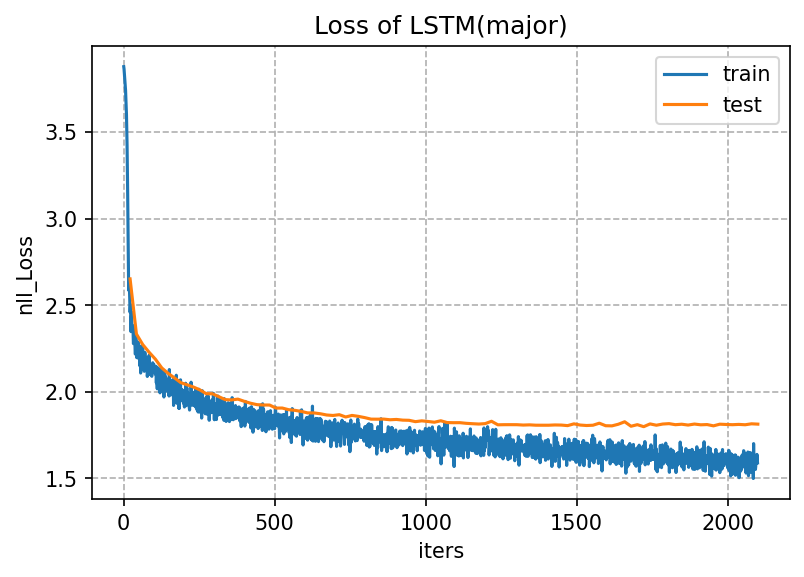

In [37]:
plt.figure(dpi=150)
plt.plot(train_loss,label='train')
plt.plot([i*21 for i in range(1,101)], test_loss[:], label='test')
plt.xlabel('iters')
plt.grid(linestyle='--')
plt.legend()
plt.ylabel('nll_Loss')
plt.title('Loss of LSTM(major)')
plt.show()

In [38]:
torch.save(AC.model.model, '../trained_models/major_lstm')

In [ ]:
#### 小调加权

## 基本统计数据

#### 三和弦频数分布

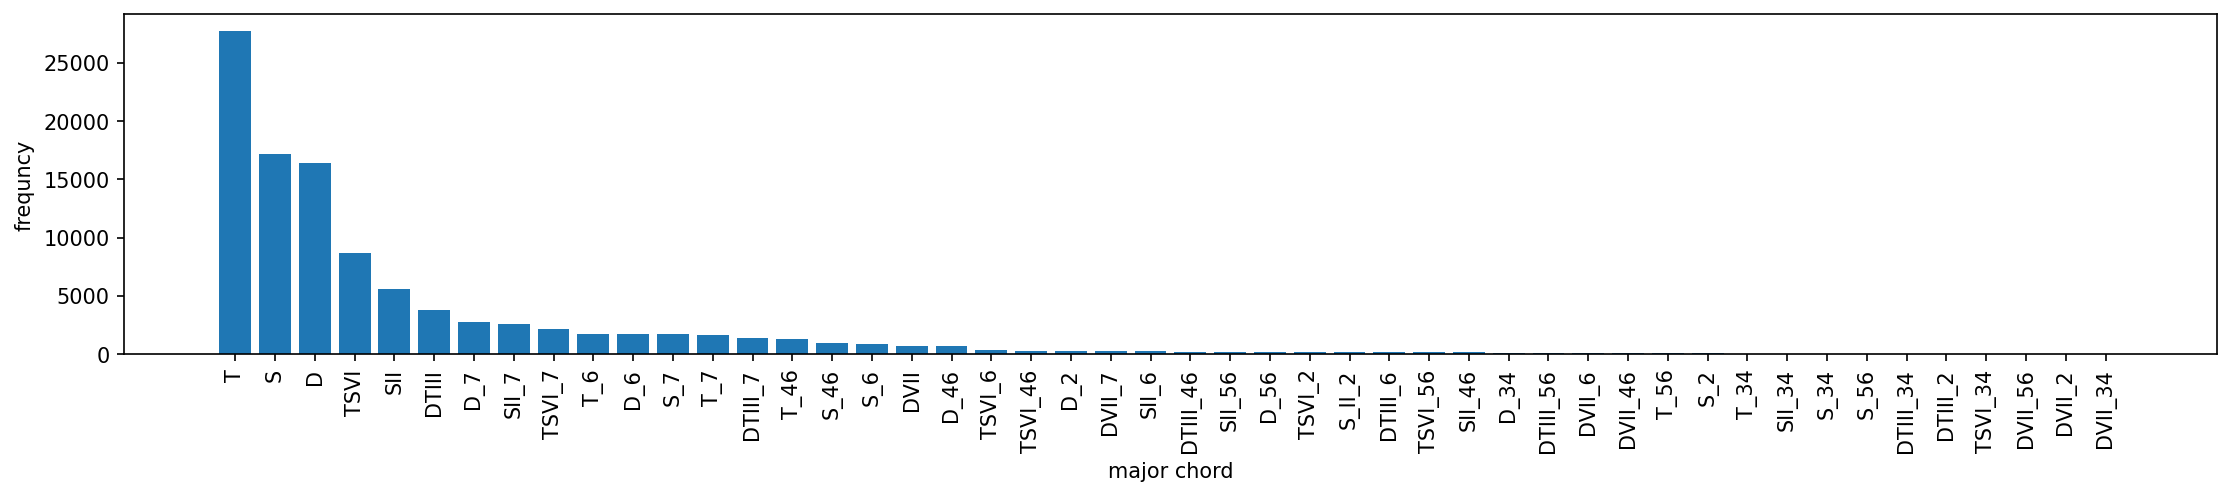

In [13]:
m = 'major'
num_dic = [(key, value) for key, value in triad_num_dic[m].items()]
num_dic = sorted(num_dic, key=lambda x:-x[1])
num = [i[1] for i in num_dic]
chord = [DL.chord_name_dic[i[0]] for i in num_dic]

plt.figure(figsize=(18,3),dpi=150)
plt.bar([i for i in range(len(num_dic))], num)
plt.xticks([i for i in range(len(num_dic))], chord, rotation=90)
#plt.grid(linestyle='--')
plt.ylabel('frequncy')
plt.xlabel('major chord')
plt.show()

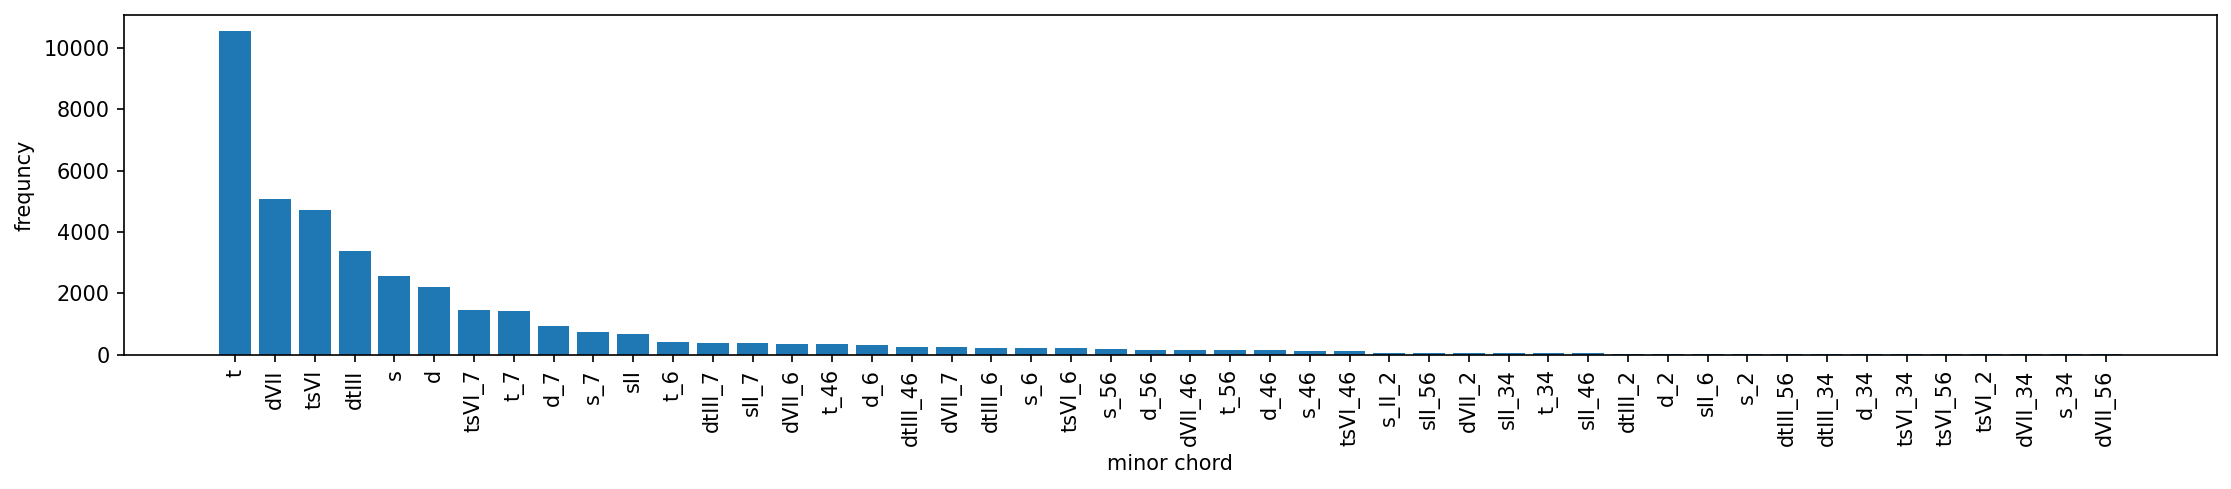

In [14]:
m = 'minor'
num_dic = [(key, value) for key, value in triad_num_dic[m].items()]
num_dic = sorted(num_dic, key=lambda x:-x[1])
num = [i[1] for i in num_dic]
chord = [DL.chord_name_dic[i[0]] for i in num_dic]

plt.figure(figsize=(18,3),dpi=150)
plt.bar([i for i in range(len(num_dic))], num)
plt.xticks([i for i in range(len(num_dic))], chord, rotation=90)
#plt.grid(linestyle='--')
plt.ylabel('frequncy')
plt.xlabel('minor chord')
plt.show()

## 测试

#### 均匀抽样的回溯算法

In [21]:
melody = np.array([0,7,2,0])
# CG.rule = rules
c = AC.generate(melody, method='lstm', tonic='minor')
print(c)

(0, 2, 5, 8) 0 (0, 3, 7) 7 hidden eight
(0, 2, 5, 8) 0 (3, 7, 0) 7 hidden eight
(0, 2, 5, 8) 0 (7, 0, 3) 7 hidden eight
(0, 2, 5, 8) 0 (3, 7, 10) 7 hidden eight
(0, 2, 5, 8) 0 (7, 10, 3) 7 hidden eight
(0, 2, 5, 8) 0 (10, 3, 7) 7 hidden eight
(0, 2, 5, 8) 0 (7, 10, 2) 7 hidden eight
(0, 2, 5, 8) 0 (10, 2, 7) 7 hidden eight
(0, 2, 5, 8) 0 (2, 7, 10) 7 hidden eight
(0, 2, 5, 8) 0 (0, 3, 7, 10) 7 hidden eight
(0, 2, 5, 8) 0 (7, 10, 0, 3) 7 p eight
(0, 2, 5, 8) 0 (7, 10, 2, 3) 7 p eight
(0, 2, 5, 8) 0 (10, 2, 3, 7) 7 hidden eight
(0, 2, 5, 8) 0 (2, 3, 7, 10) 7 hidden eight
(0, 2, 5, 8) 0 (7, 10, 2, 5) 7 p eight
(0, 2, 5, 8) 0 (10, 2, 5, 7) 7 hidden eight
(0, 2, 5, 8) 0 (2, 5, 7, 10) 7 hidden eight
(0, 2, 5, 8) 0 (8, 0, 3, 7) 7 hidden eight
(0, 2, 5, 8) 0 (0, 3, 7, 8) 7 hidden eight
(0, 2, 5, 8) 0 (7, 8, 0, 3) 7 p eight
(8, 0, 3, 5) 0 (0, 3, 7) 7 hidden eight
(8, 0, 3, 5) 0 (3, 7, 0) 7 hidden eight
(8, 0, 3, 5) 0 (7, 0, 3) 7 hidden eight
(8, 0, 3, 5) 0 (3, 7, 10) 7 hidden eight
(8, 0, 3, 5)

In [22]:
sys.path.append('../tools')
from mytools import *
for i in vec2chord(c):
    print(i)

(3, 7, 10, 0)
(2, 5, 7, 10)
(7, 10, 2)
(8, 0, 2, 5)
